In [72]:
from IPython.display import display, HTML
HTML(
    """
    <script
        src='https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js'>
    </script>
    <script>
        code_show=true;
        function code_toggle() {
        if (code_show){
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
        } else {
        $('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
        }
        code_show = !code_show
        }
        $( document ).ready(code_toggle);
    </script>
    <form action='javascript:code_toggle()'>
        <input type="submit" value='Click here to toggle on/off the raw code.'>
    </form>
    """
)

In [71]:
import fastcluster
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn_extra.cluster import KMedoids
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, fcluster
from wordcloud import WordCloud

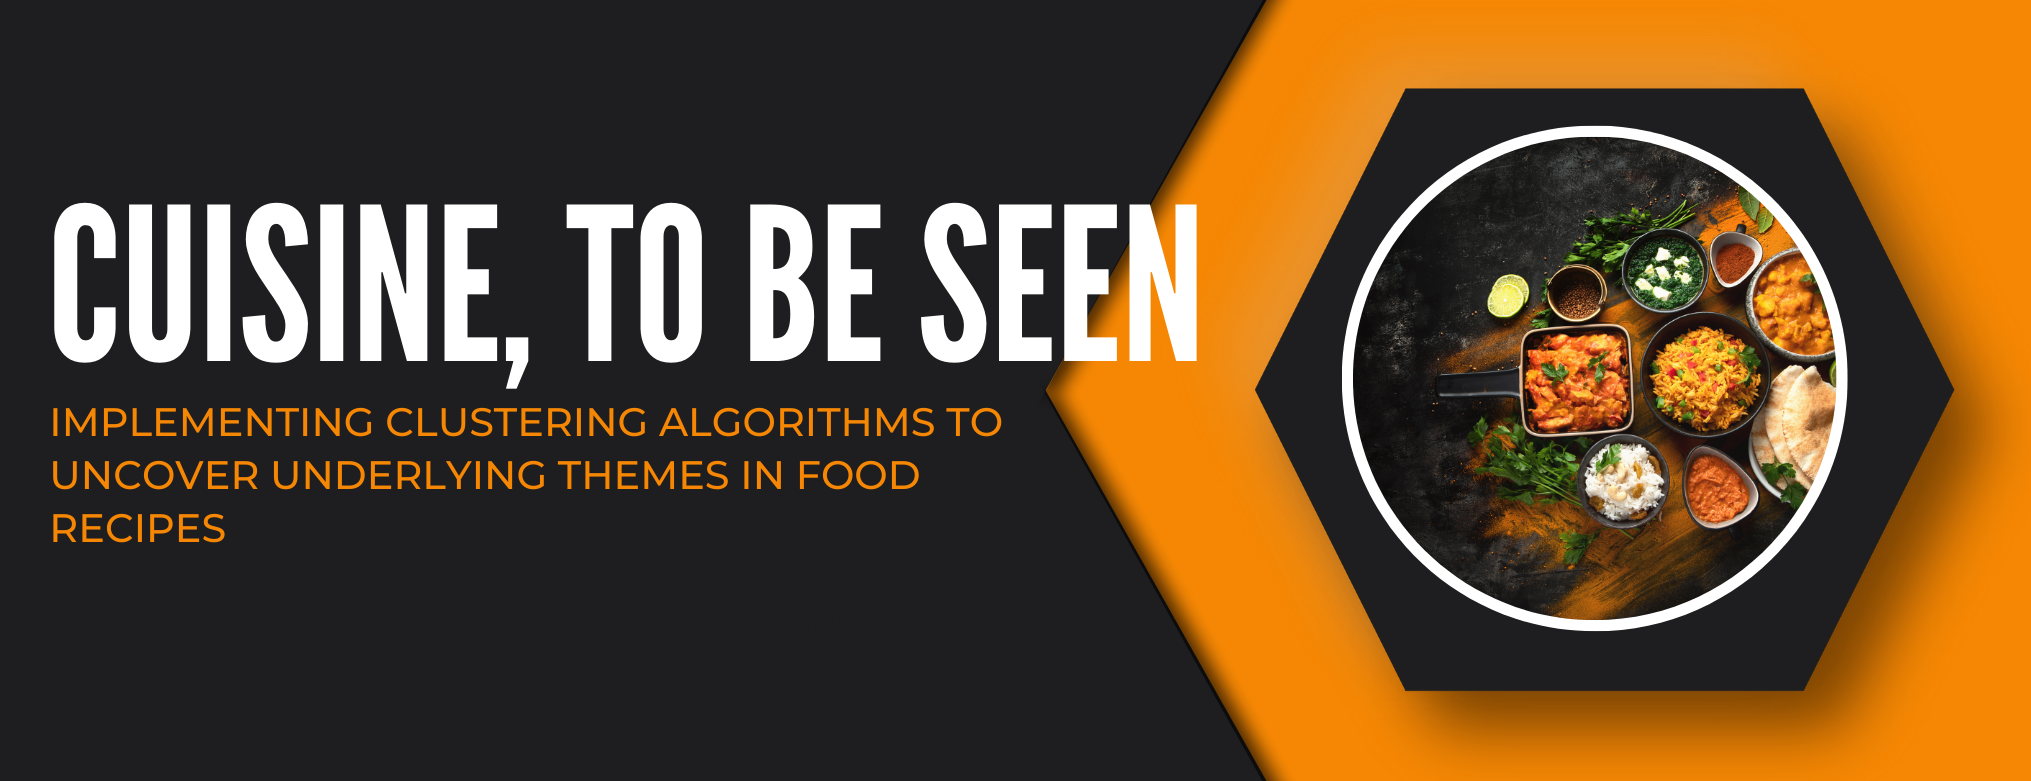

<div style="background-color: #1E1E20; padding: 10px 0;">
<center><h1 style="color: #F58704; font-family:Arial; font-weight:bold">Abstract</h1></center>
</div>

The exponential growth of online culinary resources has led to a challenge in effectively navigating and utilizing extensive recipe databases. This study aims to address the need for organizing such databases to improve accessibility and stimulate culinary innovation. Using a dataset sourced from Kaggle, the researchers employed various clustering algorithms to group recipes based on common themes. Due to computational constraints with the full dataset, various clustering algorithms, including KMeans, KMedoids, and agglomerative hierarchical methods, were applied to a sampled subset. **The analysis resulted in the identification of five distinct clusters, each themed around different culinary styles, such as Hearty Home Cooking, Fresh Chicken Recipes, Baked Sweets and Desserts, Indulging Comfort Foods, and Citrus-Infused and Tangy Flavors, with each cluster characterized by its prevalent ingredients.** While acknowledging the study's limitations, particularly in representing smaller clusters, the researchers suggest future research directions to explore combined feature sets and the possibility of clustering the full dataset if computational resources permit. This research lays a foundational framework for organizing recipe databases and offers a starting point for further exploration in culinary data science.

<div style="background-color: #1E1E20; padding: 10px 0;">
<center><h1 style="color: #F58704; font-family:Arial; font-weight:bold">Problem Statement</h1></center>
</div>

With the proliferation of online culinary resources, there is an overwhelming abundance of recipes available. While variety is beneficial, it can also lead to difficulty in navigating and utilizing such extensive databases effectively. There is a pressing need to organize recipes in a manner that enhances accessibility and fosters culinary creativity. To address this challenge, this study proposes implementing clustering algorithms with a food recipe database, aiming to group together recipes with a common theme.

<div style="background-color: #1E1E20; padding: 10px 0;">
<center><h1 style="color: #F58704; font-family:Arial; font-weight:bold">Motivation</h1></center>
</div>

Having a vast database consisting of various dishes is indeed helpful, but what would be even more beneficial is finding similar dishes that share a common theme. This would enable both cooks and chefs to access a library of recipes for inspiration and potential tweaks to their own creations. Additionally, novice home cooks can utilize this library to discover recipes they wish to try but are unsure where to start. Furthermore, recipes can be optimized based on users' preferences. Furthermore, recipes can be optimized depending on users' intent. Some may seek to recreate dishes with minimal ingredients as possible while others might want to find alternative ingredients due to resource constraints. For example, someone who wants to cook *risotto* might not have easy access to *arborio* rice and would want to look for other options.

<div style="background-color: #1E1E20; padding: 10px 0;">
<center><h1 style="color: #F58704; font-family:Arial; font-weight:bold">Data Source and Description</h1></center>
</div>

The dataset sourced from [Kaggle](https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions) comprises two files, one for recipes and another for recipe reviews. 

This analysis focuses on the recipe dataset, which consists of a diverse collection of recipes, each characterized by a unique name, a series of preparation steps, and a list of ingredients.

In [137]:
print(f'Table 1. Column names and their associated brief description.')

Table 1. Column names and their associated brief description.


| Column Name      | Description                                                      |
|------------------|------------------------------------------------------------------|
| name             | The name of the recipe.                                          |
| id               | The unique identifier for each recipe.                           |
| minutes          | The total preparation and cooking time for the recipe in minutes.|
| contributor_id   | The ID of the contributor who submitted the recipe.              |
| submitted        | The date when the recipe was submitted.                          |
| tags             | Tags associated with the recipe.                                 |
| nutrition        | Nutritional information for the recipe.                          |
| n_steps          | The total number of steps or instructions in the recipe.         |
| steps            | Detailed steps or instructions to prepare the recipe.            |
| description      | A brief description or summary of the recipe.                    |
| ingredients      | The list of ingredients required for the recipe.                 |
| n_ingredients    | The total number of ingredients used in the recipe.              |

<div style="background-color: #1E1E20; padding: 10px 0;">
<center><h1 style="color: #F58704; font-family:Arial; font-weight:bold">Methodology</h1></center>
</div>

<div style="background-color: #1E1E20; padding: 2px;">
<left><h3 style="color: #F58704; font-family:Arial; font-weight:bold">  Overview</h3></left>
</div>

The methodology adopted y the researchers following a systematic approach detailed in the following steps:

1. **Data Retrieval**: The dataset was accessed from 'Jojie' but it can be retrieved from Kaggle as well.

2. **Initial EDA**: This preliminary analysis focused on the identification of data inconsistencies, missing values, and potential outliers.

3. **Preprocessing** - The researchers utilized lemmatization to streamline the dataset, thus facilitating a more effective vectorization process. Lemmatization is the process of reducing words to their base or root form, typically aiming to normalize variant forms of a word to a common base.

4. **Bag of Words Generation** - The TFIDFVectorizer and CountVectorizer from the sklearn library were employed, with parameters set to exclude English stop words and to consider terms appearing in 1% to 95% of the recipes. Subsequent to vectorization, sampling was performed to manage dataset size.

5. **Dimensionality Reduction** - Techniques such as SVD and NMF were applied to the bag of words to reduce feature space complexity while preserving significant data variance.

6. **Optimal Cluster Count (k) Determination** - The researchers scanned the optimal number of clusters (k). For representative clustering methods internal validation scores were plotted across different k-values while dendrograms were produced and analyzed for hierarchical clustering methods.

7. **Clustering Algorithm Implementation** - Clustering was executed across various values of k, with interpretability of the resulting clusters as a critical deciding factor for the chosen k-value.

8. ***Iteration*** -  If cluster coherence was unsatisfactory, the researchers iterated the clustering process with a revised k-value range.

9. **Insight Generation**: The final step involved the categorization of clusters with descriptive labels to encapsulate the central theme of each group.

*The researchers employed various combinations of pre-processing methods, dimensionality reduction techniques, and clustering algorithms. They also experimented with different sample proportions. The results of some of these combinations were documented in a separate notebook.*

##### Limitations

The recipe dataset contains approximately 200,000 rows, presenting a significant challenge for researchers aiming to utilize various clustering methods. Primarily, the limitation lies in the computational capabilities required to run clustering algorithms on such a large dataset, particularly with regards to agglomerative hierarchical clustering methods. To address this challenge, researchers opted to perform clustering on a sampled subset of the original dataset. While this approach has its advantages, it also comes with drawbacks. It is anticipated that the original dataset will yield clusters of varying sizes, with some being more dominant than others. The less dominant clusters are likely to be smaller in size. By creating a randomly sampled dataset, the general behavior of the dominant clusters can still be captured, but nuances present in the smaller clusters may be overlooked. This is an aspect that researchers anticipate in the output of the clustering analysis performed on the sampled dataset.

<div style="background-color: #1E1E20; padding: 2px;">
<left><h3 style="color: #F58704; font-family:Arial; font-weight:bold">  Detailed</h3></left>
</div>

##### Data Retrieval and Preparation

The recipe dataset sourced from Food.com is accessed via JOJIE using the path `/mnt/data/public/food-com-recipes/RAW_recipes.csv`. This dataset comprises 12 columns and a total of 231,637 rows. A snippet of the dataset is shown below.

In [89]:
# Load data
df = pd.read_csv('/mnt/data/public/food-com-recipes/RAW_recipes.csv')

In [156]:
print(f'Table 2. A sample of raw recipes dataset from Food.com')
df.head(3)

Table 2. A sample of raw recipes dataset from Food.com


name      id  minutes  \
0  arriba   baked winter squash mexican style  137739       55   
1            a bit different  breakfast pizza   31490       30   
2                   all in the kitchen  chili  112140      130   

   contributor_id   submitted  \
0           47892  2005-09-16   
1           26278  2002-06-17   
2          196586  2005-02-25   

                                                tags  \
0  ['60-minutes-or-less', 'time-to-make', 'course...   
1  ['30-minutes-or-less', 'time-to-make', 'course...   
2  ['time-to-make', 'course', 'preparation', 'mai...   

                                    nutrition  n_steps  \
0       [51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]       11   
1   [173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]        9   
2  [269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]        6   

                                               steps  \
0  ['make a choice and proceed with recipe', 'dep...   
1  ['preheat oven to 425 degrees f', 'press dough...   
2  ['brown ground beef in large pot', 'add choppe...   

                                         description  \
0  autumn is my favorite time of year to cook! th...   
1  this recipe calls for the crust to be prebaked...   
2  this modified version of 'mom's' chili was a h...   

                                         ingredients  n_ingredients  
0  ['winter squash', 'mexican seasoning', 'mixed ...              7  
1  ['prepared pizza crust', 'sausage patty', 'egg...              6  
2  ['ground beef', 'yellow onions', 'diced tomato...             13

The researchers identified missing values, which were subsequently removed. The analysis primarily centered on the `Ingredients` column.

In [157]:
print(
    'Table 3. Snapshot of a data frame showing non-null value counts for various columns.'
)
df.isna().sum()

Table 3. Snapshot of a data frame showing non-null value counts for various columns.


name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [92]:
# Drop null values
df_recipes = df.dropna(subset=['name', 'description']).copy()
# Resample
df_recipes_resampled = df_recipes.sample(n=5000, random_state=1337)
# Use ingredients only
combined_text = df_recipes_resampled.ingredients

Subsequently, the dataset is downsampled to **5,000 samples**. Following that, lemmatization is applied using the **WordNetLemmatizer()**, and finally, the data is vectorized using the **Term Frequency-Inverse Document Frequency (TF-IDF) technique**.

In [15]:
# Lemmatize

# nltk.download('punkt')
# nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_word(word):
    return lemmatizer.lemmatize(word)

def lemmatize_recipe(recipe):
    # Tokenize the recipe into words
    words = word_tokenize(recipe)
    # Lemmatize each word
    lemmatized_words = [lemmatize_word(word) for word in words]
    # Reconstruct the lemmatized recipe
    lemmatized_recipe = ' '.join(lemmatized_words)
    return lemmatized_recipe

In [16]:
# Lemmatize each recipe
lemmatized_recipes = [
    lemmatize_recipe(recipe) for recipe in combined_text.to_list()
]

In [97]:
# nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [98]:
def tfidf_vectorize(df):
    """Vectorize lemmatized ingredients list"""
    vectorizer = TfidfVectorizer(token_pattern= r"\w+",
                                 stop_words=stop_words,
                                 min_df=0.01,
                                 max_df=0.95)
    tfidf_matrix = vectorizer.fit_transform(df)
    tfidf_features = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                            columns=tfidf_features)
    return tfidf_matrix, tfidf_df, tfidf_features, vectorizer

In [99]:
# Vectorize ingredients list
tfidf_matrix, tfidf_df, tfidf_features, tfidf_vectorizer = tfidf_vectorize(
    lemmatized_recipes)

##### Dimensionality Reduction

When working with a bag of words, the features are essentially the various words found in the corpus, resulting in a large number of unique words. As a consequence, the dataframe created by the bag of words tends to be sparse. To tackle this issue of sparsity, we employ dimensionality reduction techniques to transform the datapoints, aiming to maximize the variance explained while minimizing the number of features.

During the data exploration, the researchers opted to investigate Singular Value Decomposition (SVD) and Non-Negative Matrix Factorization (NMF) for specific reasons. SVD is chosen because it performs well with sparse data, unlike Principal Component Analysis (PCA), as the dataset doesn't necessarily need to be mean-centered. Moreover, SVD is expected to effectively capture the necessary variance with minimal singular values.

Additionally, the researchers considered NMF because they perceived the recipe dataset as non-negative, where the interpretations of different recipes are influenced by the presence or absence of ingredients. This approach allows the team to better understand the inherent structure of the data and extract meaningful insights.

To identify the optimal parameters for the dimensionality reduction techniques, the researchers analyzed the cumulative explained variance plot for SVD and the silhouette score plots for NMF. A sample of these plots are shown below.

In [151]:
def truncated_svd(X):
    """
    Perform truncated Singular Value Decomposition (SVD) on the input matrix.
    """
    q, sigma, p = np.linalg.svd(X)
    s = np.diag(sigma)
    nssd = sigma**2 / sum(sigma**2)
    return q, s, p.T, nssd


def plot_expvar(nssd, threshold=0.90):
    """
    Plot individual and cumulative variance explained of dimentionally reduced
    data frame"""
    cumulative_explained_variance = np.cumsum(nssd)

    n_components = np.argmax(cumulative_explained_variance >= threshold) + 1

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(range(1,
                  len(nssd) + 1),
            nssd,
            ls='-',
            color='gold',
            label='Individual')
    ax.plot(range(1,
                  len(cumulative_explained_variance) + 1),
            cumulative_explained_variance,
            ls='-',
            color='sandybrown',
            label='Cumulative')

    ax.axhline(threshold, ls='--', color='maroon')
    ax.axvline(n_components, ls='--', color='maroon')

    ax.text(n_components + 1,
            threshold,
            f'SV={n_components}',
            va='top',
            ha='left')

    ax.set_xlim(0, len(nssd) + 1)
    ax.set_ylabel('Variance Explained')
    ax.set_xlabel('SV')
    plt.title('Figure 1. Cumulative Explained Variance Plot', fontsize=14)
    ax.legend()
    plt.show()
    return n_components

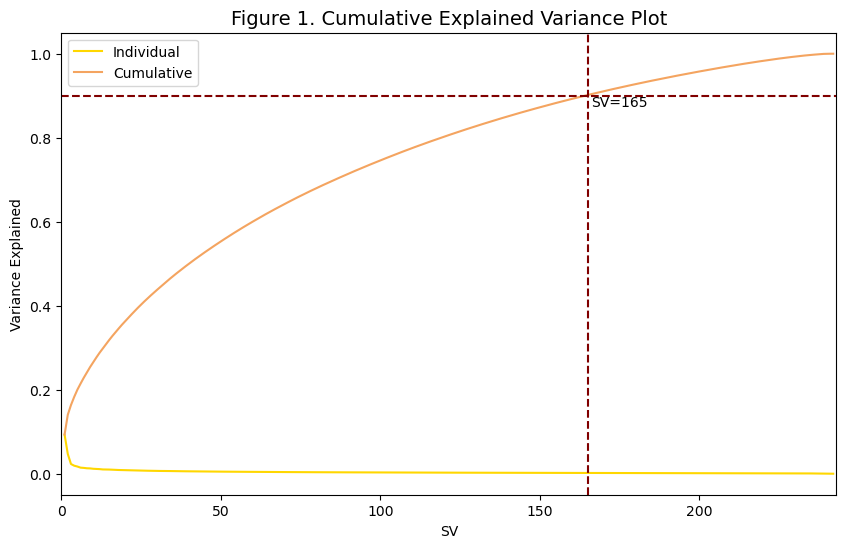

In [152]:
q, s, p, nssd = truncated_svd(tfidf_df)
n_components = plot_expvar(nssd)

In [159]:
def silhouette_test(bow):
    """Get silhoutte scores at various n_components"""
    silhouette_scores = []
    n_components = range(2, 16)
    for n_component in n_components:
        nmf_ = NMF(n_components=n_component, max_iter=1000)
        W = nmf_.fit_transform(bow)
        cluster_labels = nmf_.transform(bow).argmax(axis=1)
        silhouette_avg = silhouette_score(bow, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    return silhouette_scores


def plot_silhouette_scores(silhouette_scores):
    """Plot silhoutte scores"""
    n_components = range(2, 16)
    plt.figure(figsize=(10, 6))
    plt.plot(n_components, silhouette_scores, marker='o', color='sienna')

    plt.xlabel(r'$n_\text{components}$', fontsize=14)
    plt.ylabel('Silhouette Score', fontsize=14)
    plt.title('Figure 2. Silhouette Method for Optimal NMF Components',
              fontsize=14)
    plt.xticks(range(min(n_components), max(n_components) + 1, 2))
    plt.show()

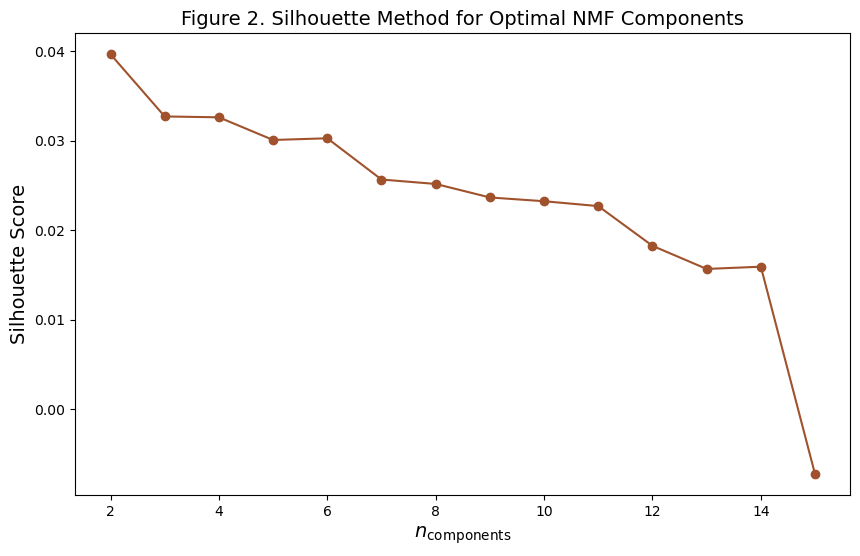

In [160]:
silhouette_scores_tfidf = silhouette_test(tfidf_matrix)
plot_silhouette_scores(silhouette_scores_tfidf)

In [108]:
# Dimensionality reduction of vectorized list
nmf = NMF(n_components=6, max_iter=1000)
nmf_tfidf = nmf.fit_transform(tfidf_matrix)

##### Clustering

This study implements three general clustering methods: Representative Clustering, Agglomerative Hierarchical Clustering, and Density-Based Clustering. Each method has its own advantages and disadvantages.

Within Representative Clustering, KMeans has proven to be an effective baseline due to its simplicity and efficiency. In contrast, KMedoids, while potentially more robust to outliers and returning an actual data point as the cluster representative, is more computationally intensive.

The advantage of Agglomerative Hierarchical Clustering lies in its ability to reveal the detailed structure and relationships between clusters. However, this method is also known for its high computational cost, especially with large datasets.

Density-Based Clustering is adept at identifying non-spherical clusters, which is beneficial for complex data structures. However, it tends to be less effective with high-dimensional text data due to the curse of dimensionality.

To identify the optimal number of clusters, the researchers examined various internal validation scores and analyzed the dendrograms generated. Internal validation plots were utilized for representative clustering, while dendrograms were employed for hierarchical clustering methods. Samples of the plots and dendrogram are shown below

*Results of the different clusters will be shown in the following section, except for Density Based Clustering. It can be viewed on a separate supplementary notebook.*


In [124]:
from sklearn.metrics import (
    calinski_harabasz_score,
    davies_bouldin_score,
    silhouette_score,
)
from sklearn.base import clone
from scipy.spatial.distance import euclidean

In [125]:
def pooled_within_ssd(X, y, centroids, dist):
    """Compute pooled within-cluster sum of squares around the cluster mean"""
    k = len(centroids)
    W_k = 0
    for j in range(k):
        C_j = X[y == j]
        x_bar_j = centroids[j]
        n_j = len(C_j)
        for point in C_j:
            W_k += np.sum(dist(point, x_bar_j) ** 2) / (2 * n_j)
    return W_k

In [126]:
def gen_realizations(X, b, random_state=None):
    """Generate b random realizations of X"""
    mins = X.min(axis=0)
    maxs = X.max(axis=0)
    rng = np.random.default_rng(random_state)
    nrows, ncols = X.shape
    return rng.uniform(
        np.tile(mins, (b, nrows, 1)),
        np.tile(maxs, (b, nrows, 1)),
        size=(b, nrows, ncols),
    )

In [127]:
def gap_statistic(X, y, centroids, dist, b, clusterer, random_state=None):
    """Compute the gap statistic """
    X_refs = gen_realizations(X, b, random_state)
    W_k = pooled_within_ssd(X, y, centroids, dist)
    gap = []
    for X_ref in X_refs:
        clusters = clusterer.fit_predict(X_ref)
        cluster_centers = clusterer.cluster_centers_
        ssd = pooled_within_ssd(X_ref, clusters, cluster_centers, dist)
        log_ratio = np.log(ssd) - np.log(W_k)
        gap.append(log_ratio)
    gs = sum(gap)/b
    gs_std = np.std(gap)
    return gs, gs_std

In [128]:
def cluster_range(X, clusterer, k_start, k_stop):
    """Cluster X for different values of k"""
    ys = []
    centers = []
    inertias = []
    chs = []
    scs = []
    dbs = []
    gss = []
    gssds = []
    for k in range(k_start, k_stop + 1):
        clusterer_k = clone(clusterer).set_params(n_clusters=k)
        clusterer_k.fit(X)
        labels = clusterer_k.labels_
        centroids = clusterer_k.cluster_centers_
        inertia = clusterer_k.inertia_
        
        ys.append(labels)
        centers.append(centroids)
        inertias.append(inertia)
        
        if k > 1:
            chs.append(calinski_harabasz_score(X, labels))
            scs.append(silhouette_score(X, labels))
            dbs.append(davies_bouldin_score(X, labels))
        else:
            chs.append(None)
            scs.append(None)
            dbs.append(None)
            
        gs = gap_statistic(
            X,
            labels,
            clusterer_k.cluster_centers_,
            euclidean,
            5,
            clone(clusterer).set_params(n_clusters=k),
            random_state=1337,
        )
        gss.append(gs[0])
        gssds.append(gs[1])
        
    return {
        'ys': ys,
        'centers': centers,
        'inertias': inertias,
        'chs': chs,
        'scs': scs,
        'dbs': dbs,
        'gss': gss,
        'gssds': gssds
        }

In [129]:
def plot_internal(ax, inertias, chs, scs, dbs, gss, gssds):
    """Plot internal validation values"""
    ks = np.arange(2, len(inertias) + 2)
    ax.plot(ks, inertias, "-o", label="SSE")
    ax.plot(ks, chs, "-ro", label="CH")
    ax.set_xlabel("$k$")
    ax.set_ylabel("SSE/CH")
    lines, labels = ax.get_legend_handles_labels()
    ax2 = ax.twinx()
    ax2.errorbar(ks, gss, gssds, fmt="-go", label="Gap statistic")
    ax2.plot(ks, scs, "-ko", label="Silhouette coefficient")
    ax2.plot(ks, dbs, "-gs", label="DB")
    ax2.set_ylabel("Gap statistic/Silhouette/DB")
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2)
    return ax

In [130]:
res_recipe_kmeans = cluster_range(
    nmf_tfidf, KMeans(n_init='auto', random_state=1337), 2, 11
)

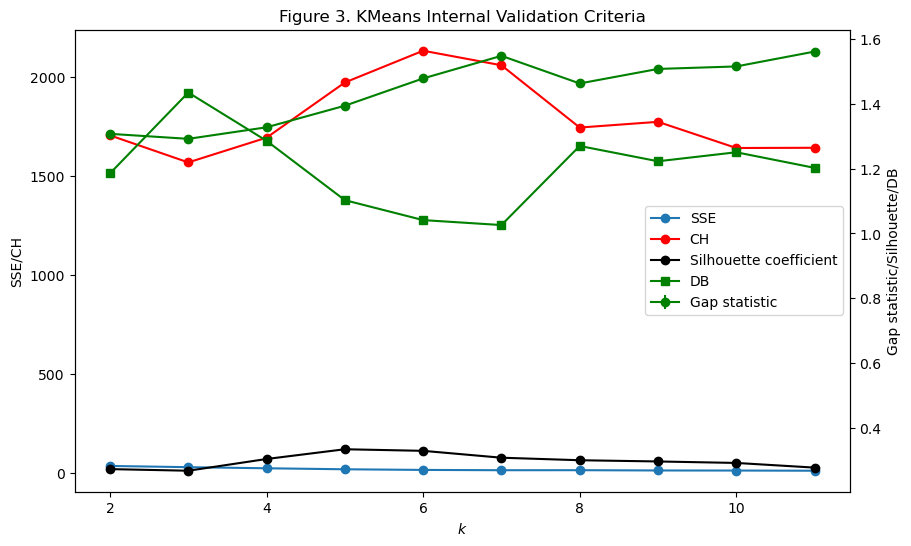

In [140]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_internal(
    ax,
    res_recipe_kmeans["inertias"],
    res_recipe_kmeans["chs"],
    res_recipe_kmeans["scs"],
    res_recipe_kmeans["dbs"],
    res_recipe_kmeans["gss"],
    res_recipe_kmeans["gssds"],
)
plt.title('Figure 3. KMeans Internal Validation Criteria')
plt.show()

In [87]:
def modified_dendrogram(Z, title=None, ax=None):
    """Plot a dendrogram based on the linkage matrix Z."""
    if ax is None:
        fig, ax = plt.subplots()
    dn = dendrogram(Z, p=5, truncate_mode='level', ax=ax)
    if title:
        ax.set_xlabel(title)
        ax.xaxis.set_label_position('top')
    return ax.set_ylabel(r"$\Delta$")

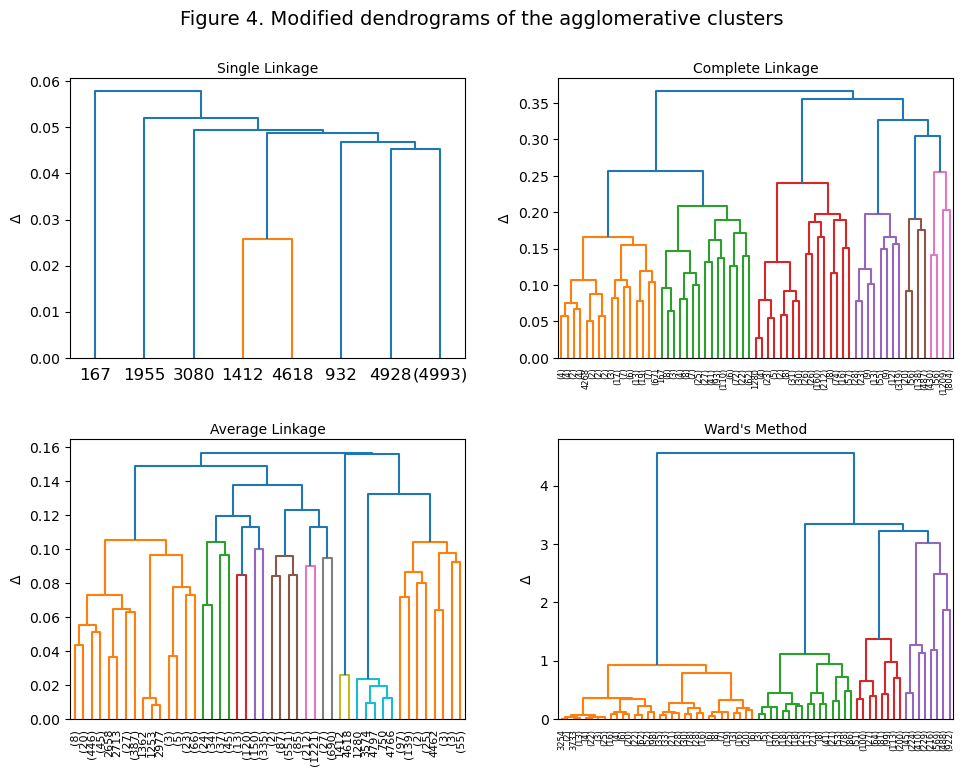

In [158]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.subplots_adjust(top=0.88)

Z_single = fastcluster.linkage(nmf_tfidf, method='single')
Z_complete = fastcluster.linkage(nmf_tfidf, method='complete')
Z_ave = fastcluster.linkage(nmf_tfidf, method='average')
Z_ward = fastcluster.linkage(nmf_tfidf, method='ward')

modified_dendrogram(Z_single, title='Single Linkage', ax=axs[0, 0])
modified_dendrogram(Z_complete, title='Complete Linkage', ax=axs[0, 1])
modified_dendrogram(Z_ave, title='Average Linkage', ax=axs[1, 0])
modified_dendrogram(Z_ward, title="Ward's Method", ax=axs[1, 1])

plt.tight_layout(pad=2, h_pad=2, w_pad=2, rect=[0,0,1,0.95])
plt.suptitle('Figure 4. Modified dendrograms of the agglomerative clusters',
             fontsize=14)
plt.show()

<div style="background-color: #1E1E20; padding: 10px 0;">
<center><h1 style="color: #F58704; font-family:Arial; font-weight:bold">Results and Discussions</h1></center>
</div>

The final parameters for clustering utilized by the researchers in this study included focusing on the feature "ingredients," lemmatizing words, and employing TF-IDF as the vectorizer. Additionally, NMF served as the dimensionality reduction technique, with 'min_df' and 'max_df' thresholds set at 0.01 and 0.95, respectively. Both KMeans and KMedoids clustering algorithms were implemented with 'n_clusters' set to 5. Furthermore, agglomerative hierarchical clustering methods particularly, Complete and Ward were applied, with thresholds configured to generate 5 clusters. Single and Average methods generated clusters that did not conform with the rest.

#### Representative Clustering

In [141]:
def representative_wc(bow_df, nmf_bow, method, n_clusters, wc, X='X',
                      cl_names=None):
    """Generate wordcloud from results of clustering"""
    if method == 'KMeans':
        kmeans_jokes = KMeans(n_clusters=n_clusters,
                              random_state=1337,
                              n_init='auto')
        cluster_labels = kmeans_jokes.fit_predict(nmf_bow)
    elif method == 'KMedoids':
        kmedoids_jokes = KMedoids(n_clusters=n_clusters,
                                  method="pam",
                                  random_state=1337)
        cluster_labels = kmedoids_jokes.fit_predict(nmf_bow)

    num_rows = int(np.ceil(n_clusters / 3))
    num_cols = min(n_clusters, 3)

    fig, ax = plt.subplots(num_rows,
                           num_cols,
                           figsize=(5 * num_cols, 4 * num_rows),
                           dpi=100)
    fig.subplots_adjust(wspace=0.2, hspace=0.4)
    ax = ax.flatten() if num_rows > 1 else ax

    for i, label in enumerate(np.unique(cluster_labels)):
        idx = np.argwhere(cluster_labels == label).flatten()
        weights = bow_df.iloc[idx].sum()
        
        ax[i].imshow(wc.generate_from_frequencies(weights),
                     interpolation='spline16')
        if cl_names is not None:
            ax[i].set_title(label, fontsize=18)
        ax[i].set_axis_off()

    for j in range(n_clusters, num_rows * num_cols):
        fig.delaxes(ax[j])
        
    plt.suptitle(f'Figure {str(X)}. Generated WordCloud from {method} clusters',
                fontsize=14)
    plt.tight_layout()
    plt.show()
    return cluster_labels

In [142]:
# Initialize a WordCloud object
wc = WordCloud(width=400, height=400, background_color='white', colormap='copper')

##### KMeans

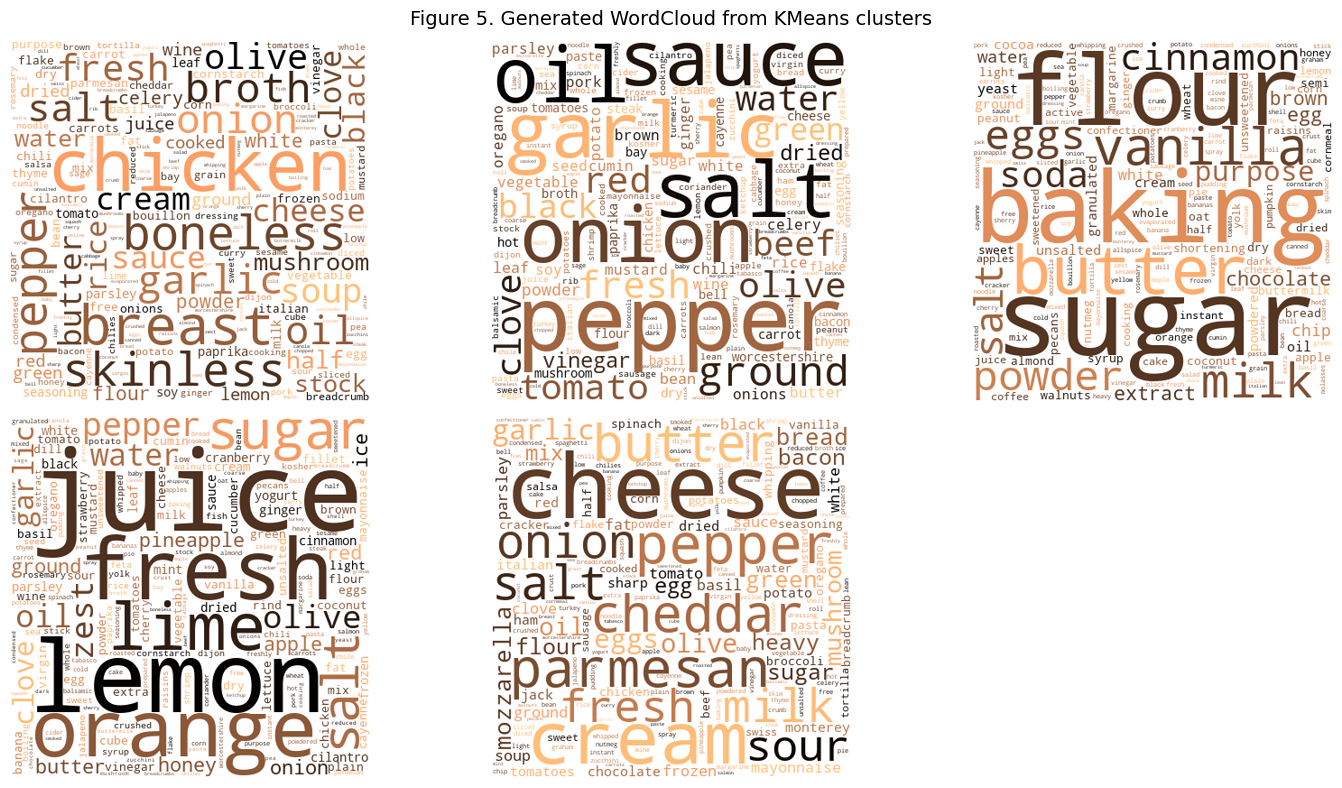

In [143]:
# Results for KMeans
cl_kmeans = representative_wc(tfidf_df, nmf_tfidf, 'KMeans', 5, wc, 5)


##### KMedoids

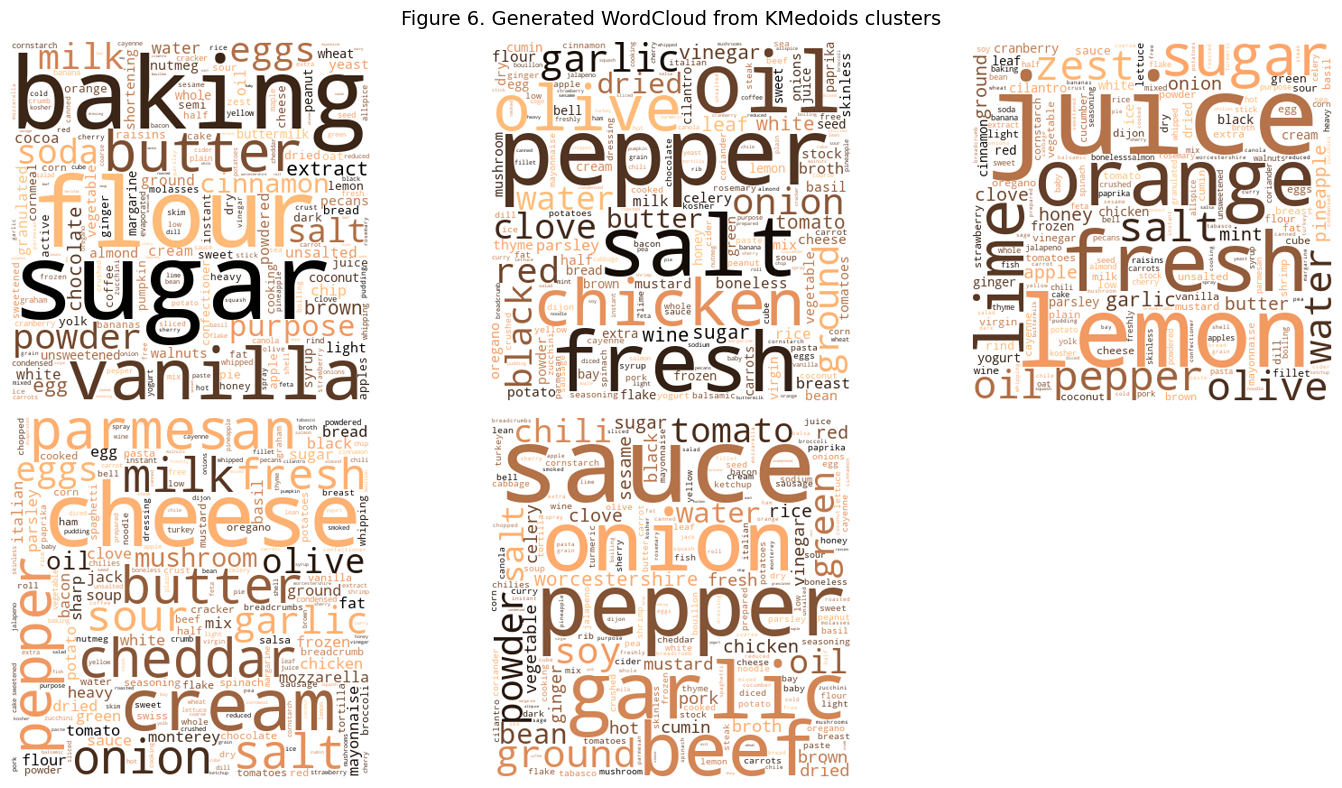

In [144]:
# Results for KMedoids

cl_kmedoids = representative_wc(tfidf_df, nmf_tfidf, 'KMedoids', 5, wc, 6)

#### Agglomerative Hierarchical Clustering

In [147]:
def heirarchal_wc(cluster_labels, bow_df, method, n_clusters, wc, X='X',
                   cl_names=None):
    num_rows = int(np.ceil(n_clusters / 3))
    num_cols = min(n_clusters, 3)

    fig, ax = plt.subplots(num_rows,
                           num_cols,
                           figsize=(5 * num_cols, 4 * num_rows),
                           dpi=100)
    fig.subplots_adjust(wspace=0.2, hspace=0.4)
    ax = ax.flatten() if num_rows > 1 else ax

    for i, label in enumerate(np.unique(cluster_labels)):
        idx = np.argwhere(cluster_labels == label).flatten()
        weights = bow_df.iloc[idx].sum()

        ax[i].imshow(wc.generate_from_frequencies(weights),
                     interpolation='spline16')
        if cl_names is not None:
            ax[i].set_title(cl_names[i], fontsize=18)
        ax[i].set_axis_off()

    for j in range(n_clusters, num_rows * num_cols):
        fig.delaxes(ax[j])
        
    plt.suptitle(f'Figure {str(X)}. Generated WordCloud from {method} clusters',
                fontsize=14)
    plt.tight_layout()
    plt.show()

In [148]:
# Calculate hierarchical cluster linkage matrices
Z_complete = fastcluster.linkage(nmf_tfidf, method='complete')
Z_ward = fastcluster.linkage(nmf_tfidf, method='ward')

# Define threshold values for each linkage method
t_complete = 0.30
t_ward = 2.8

# Perform clustering 
y_predict_complete = fcluster(Z_complete, t=t_complete, criterion="distance")
y_predict_ward = fcluster(Z_ward, t=t_ward, criterion="distance")

# Calculate number of clusters for each linkage method
k_complete = len(np.unique(y_predict_complete))
k_ward = len(np.unique(y_predict_ward))


##### Complete Linkage 

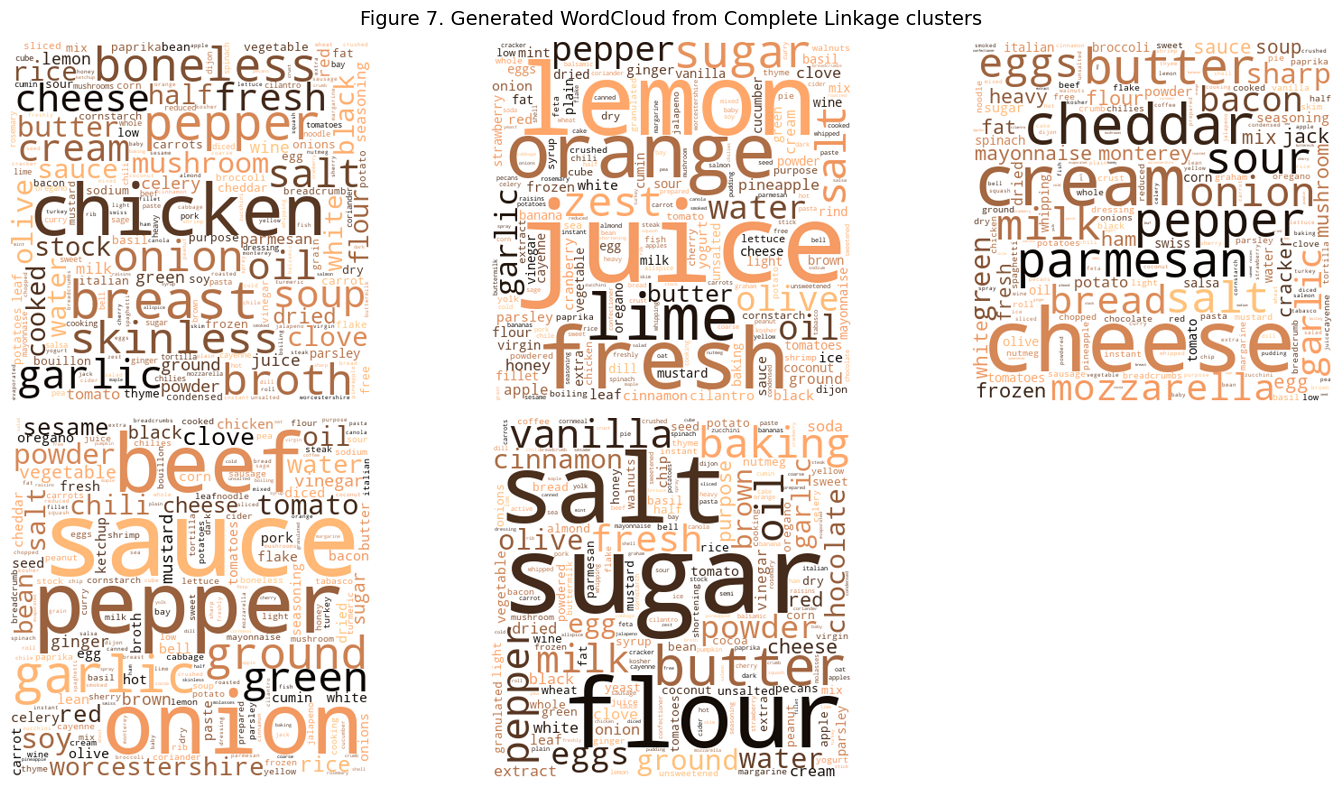

In [149]:
# Results for Complete Linkage

heirarchal_wc(y_predict_complete,
              tfidf_df,
              'Complete Linkage',
              k_complete,
              wc,
              7)

##### Ward

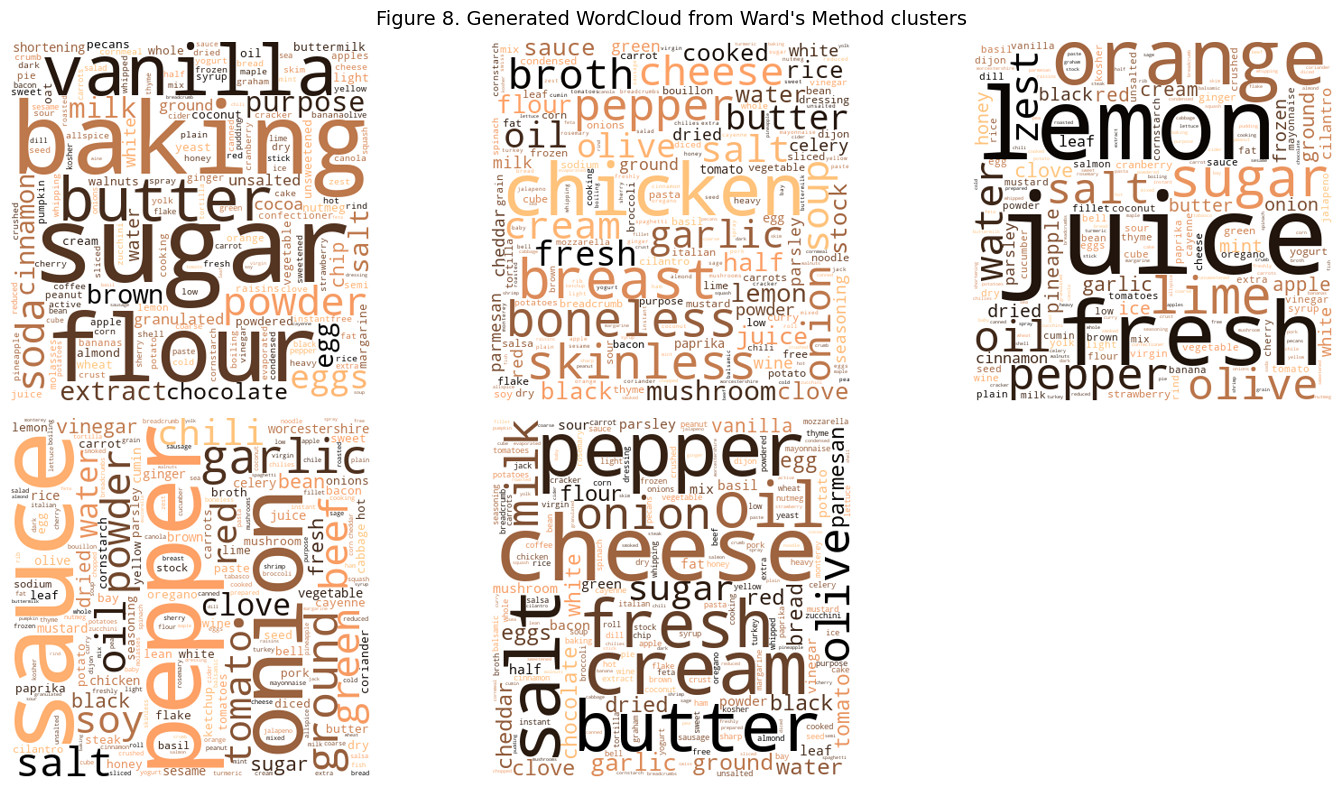

In [150]:
# Results for Ward Method

heirarchal_wc(y_predict_ward,
              tfidf_df,
              "Ward's Method",
              k_ward,
              wc,
              8)              

<div style="background-color: #1E1E20; padding: 10px 0;">
<center><h1 style="color: #F58704; font-family:Arial; font-weight:bold">Conclusion</h1></center>
</div>

Observing the different clusters formed by the different clustering algorithms, the researchers concludes that from the sampled dataset there are 5 clusters that are generally formed.

The themes are as follows:
1. **Hearty Home Cooking** - Dominance of ingredients like beef, onion, garlic, tomato, and various spices suggests recipes for stews, meat-based sauces, or hearty soups.
2. **Fresh Chicken Recipes** - Chicken is the main viand of these clustered recipes and in addition, presence of different herbs suggest that these are on the healthier recipe options
3. **Baked Sweets and Desserts** - The presence of sugar, cinnamon, eggs, and butter indicates a focus on baking, particularly sweet treats like cookies, cakes, and pastries.
4. **Indulging Comfort Foods** - This cluster features ingredients like cheese, butter, garlic, and potato, which are staples in comfort food dishes.
5. **Citrus-Infused and Tangy Flavors** - With prominent words like orange, lime, lemon, and vinegar, this cluster seems to capture recipes that have a citrus or vinegary profile.



The generation of these clusters offers valuable assistance to chefs and cooks of varying experience levels in managing their dishes. They can easily refer to these clusters for variations on familiar recipes and explore similar dishes for ingredient substitutions.

Health-conscious individuals will find the `Fresh Chicken Recipes` cluster particularly valuable, offering nutritious options aligned with their preferences.

Likewise, sweet-toothed individuals can indulge in the diverse array of confectionery delights found in the `Baked Sweets and Desserts` cluster.

For those who enjoy hearty, comforting meals, both the `Indulging Comfort Foods` and `Hearty Home-cooking` clusters provide a wealth of satisfying options.

These examples illustrate how clustering benefits both home cooks and professional chefs, reinforcing the researchers' initial motivations for the study.

<div style="background-color: #1E1E20; padding: 10px 0;">
<center><h1 style="color: #F58704; font-family:Arial; font-weight:bold">Recommendations</h1></center>
</div>

#### Future Studies


- The researchers recommend further studies to experiment with creating a combined bag of words from different feature sets, such as "Steps," "Ingredients," and "Name." This approach may yield unique clustering outcomes, revealing new insights into recipe similarities.

- The researchers advocate exploring n-grams, particularly bigrams, in future studies. Bigrams can capture nuanced meanings that may not be evident when considering individual words separately. For instance, "black pepper" conveys a distinct culinary concept, highlighting the importance of analyzing word combinations.

- If computational capabilities permit, conducting clustering on the entire dataset is advisable. This approach would facilitate the capture of smaller clusters that may form, providing a more comprehensive understanding of the dataset's structure and potential insights into recipe groupings.

- The researchers aim to expand the study by exploring parameters or combinations of parameters capable of generating clusters that effectively differentiate between cultural cuisines or between geographical cuisines. For instance, distinguishing Spanish recipes from Mediterranean ones.

### References

- Shuyangli94. Food.com Recipes and User Interactions. Retrieved from https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions
- Alis, C. (2024). Representative Clustering [Class handout]. Asian Institute of Management, COSCI 211.
- Alis, C. (2024). Hierarchical Clustering [Class handout]. Asian Institute of Management, COSCI 211.
- OpenAI. (2022). ChatGPT (Version 3.5 and Version 4.0) [Computer software]. Retrieved from https://www.openai.com/

### Acknowledgements

This accomplishment owes much to the invaluable guidance, understanding, and patience extended to us by our mentor, Dr. Christian Alis.